<center><h1>Patel_Datt_HW3</h1></center>
<br>
<br>

Name: Datt Patel
<br>
Github Username: dattpatel99
<br>
USC ID: 2149812400

## 1. Time Series Classification Part 1: Feature Creation/Extraction

### (a) Download Data

Package imports

In [13]:
import pandas as pd
import numpy as np
import glob
import bootstrapped.bootstrap as bs
import bootstrapped.stats_functions as bs_stats
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

Get the AReM Data Set

Load Data

In [14]:
def getAllFiles(path):
    return glob.glob(path + '/*csv')

dir_path = '../data/AReM/'

folder_names = ['bending1','bending2','cycling', 'lying','sitting','standing','walking']
column_names = 'time,avg_rss12,var_rss12,avg_rss13,var_rss13,avg_rss23,var_rss23'.split(',')


'''
Data:
    Folder1:
    [
        Dataset1: Dataframe,
        Dataset2: Dataframe,
        ...
        
    ]        
    Folder2:
    ...

'''

data = {}
for folder in folder_names:
    files = getAllFiles(dir_path + folder)
    instances = {}
    for i in range(len(files)):
        file = files[i]
        file = file.replace("\\", "/")
        df = pd.read_csv(file, skiprows=5, names=column_names, index_col='time')
        instances['dataset'+str(i+1)] = df
    data[folder] = instances

### (b) Test and Train Data

In [15]:
def traintestsplit(data, folder_names):
    train_data = []
    test_data = []
    out_counter = 2
    for folder in folder_names:
        files = data[folder]
        num_test = 3
        if out_counter > 0:
            num_test = 2
            out_counter -= 1
        for file in files:
            if (num_test >0):
                test_data.append(data[folder][file])
                num_test -= 1
            else:
                train_data.append(data[folder][file])
    return train_data, test_data

train_data, test_data = traintestsplit(data, folder_names)

In [16]:
print("Number of Datasets in Train data: {}".format(len(train_data)))

Number of Datasets in Train data: 69


In [17]:
print("Number of Datasets in Test data: {}".format(len(test_data)))

Number of Datasets in Test data: 19


### (c) Feature Extraction

#### i. Research

Some of the common time-domain features are usually used in time series classification are:

Mean, Standard Deviation, Median, Maximum, Minimum, Range, Interquartile Range (IQR).

Additional time-domain features are: 
(https://stats.stackexchange.com/questions/50807/features-for-time-series-classification)
(https://www.researchgate.net/figure/Time-domain-features_tbl1_279991612#:~:text=The%20time%2Ddomain%20features%20are,Kurtosis%20and%20Skewness.%20...)

Kurtosis: A measure of the tail distribution of the data, indicating whether it is heavy-tailed or light-tailed relative to a normal distribution

Skewness: A measure of the asymmetry of the data distribution

Root Mean Square (RMS): The square root of the mean of the squared values of the data

#### ii. Extraction

In [18]:
'''
rows are of datasets.
columns are of min 1-6 for each time series
'''
col_name = ['min', 'max', 'mean', 'median', 'std', '1st_quartile_', '3rd_quartile_']
titles = [nm + str(i) for i in range(1,7) for nm in col_name]
titles.append('Label')

table_rows = []
label_counter = 1

for folder in folder_names:
    for file in data[folder]:
        dataset = data[folder][file]
        stats = dataset.describe().T
        stats['median'] = dataset.median()
        stats = stats[['min','max','mean','median', 'std', '25%','75%']]

        row_data = []

        for i in range(6):
            row_data.append(np.array(stats.iloc[i,:]))
        row = np.concatenate(row_data)
        row = np.append(row, label_counter)
        table_rows.append(row)
    label_counter += 1
stats_table = pd.DataFrame(table_rows, columns=titles)
stats_table.index.names = ["Instances"]
print('Table shape: ',stats_table.shape)
stats_table.iloc[:, :-1]

Table shape:  (88, 43)


,min1,max1,mean1,median1,std1,1st_quartile_1,3rd_quartile_1,min2,max2,mean2,...,std5,1st_quartile_5,3rd_quartile_5,min6,max6,mean6,median6,std6,1st_quartile_6,3rd_quartile_6
Instances,,,,,,,,,,,,,,,,,,,,,
0,37.25,45.00,40.624792,40.500,1.476967,39.25,42.0000,0.0,1.30,0.358604,...,2.188449,33.0000,36.00,0.0,1.92,0.570583,0.430,0.582915,0.00,1.3000
1,38.00,45.67,42.812812,42.500,1.435550,42.00,43.6700,0.0,1.22,0.372437,...,1.995255,32.0000,34.50,0.0,3.11,0.571083,0.430,0.601010,0.00,1.3000
2,35.00,47.40,43.954500,44.330,1.558835,43.00,45.0000,0.0,1.70,0.426250,...,1.999604,35.3625,36.50,0.0,1.79,0.493292,0.430,0.513506,0.00,0.9400
3,33.00,47.75,42.179812,43.500,3.670666,39.15,45.0000,0.0,3.00,0.696042,...,3.849448,30.4575,36.33,0.0,2.18,0.613521,0.500,0.524317,0.00,1.0000
4,33.00,45.75,41.678063,41.750,2.243490,41.33,42.7500,0.0,2.83,0.535979,...,2.411026,28.4575,31.25,0.0,1.79,0.383292,0.430,0.389164,0.00,0.5000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,20.75,46.25,34.763333,35.290,4.742208,31.67,38.2500,0.0,12.68,4.223792,...,3.174681,14.2500,18.33,0.0,9.39,3.288271,3.270,1.647528,2.05,4.3050
84,21.50,51.00,34.935812,35.500,4.645944,32.00,38.0625,0.0,12.21,4.115750,...,3.192058,14.2375,18.25,0.0,10.21,3.280021,3.015,1.700918,2.12,4.5000
85,18.33,47.67,34.333042,34.750,4.948770,31.25,38.0000,0.0,12.48,4.396958,...,3.000493,13.7500,18.00,0.0,8.01,3.261583,2.980,1.617290,2.05,4.3200


#### iii. Standard Deviation

In [19]:
stats_table.iloc[:, :-1].describe().loc['std']

min1              9.569975
max1              4.394362
mean1             5.335718
median1           5.440054
std1              1.772153
1st_quartile_1    6.153590
3rd_quartile_1    5.138925
min2              0.000000
max2              5.062729
mean2             1.574164
median2           1.412244
std2              0.884105
1st_quartile_2    0.946386
3rd_quartile_2    2.125266
min3              2.956462
max3              4.875137
mean3             4.008380
median3           4.036396
std3              0.946710
1st_quartile_3    4.220658
3rd_quartile_3    4.171628
min4              0.000000
max4              2.183625
mean4             1.166114
median4           1.145586
std4              0.458242
1st_quartile_4    0.843620
3rd_quartile_4    1.552504
min5              6.124001
max5              5.741238
mean5             5.675593
median5           5.813782
std5              1.024898
1st_quartile_5    6.096465
3rd_quartile_5    5.531720
min6              0.045838
max6              2.518921
m

In [20]:
stdev_results = []

for i in range(len(stats_table.columns[:-1])):
    result = bs.bootstrap(np.array(stats_table.iloc[:, i]), stat_func=bs_stats.std, alpha=0.1)
    confidnence_interval = np.array(str(result).replace('    ', ' ').replace('(','').replace(')','').replace(',','').split(' ')).astype(np.float64)
    stdev_results.append(np.round(confidnence_interval, 8))
confidence_table = pd.DataFrame(stdev_results, columns=['STD', 'Lower Confidence Interval', 'Upper Confidence Interval'], index=[stats_table.columns[:-1]])
confidence_table

,STD,Lower Confidence Interval,Upper Confidence Interval
min1,9.515445,8.295594,10.801189
max1,4.369322,3.480512,5.416622
mean1,5.305314,4.757746,5.933971
median1,5.409056,4.846123,6.051774
std1,1.762056,1.587862,1.962129
1st_quartile_1,6.118526,5.626732,6.692525
3rd_quartile_1,5.109643,4.412395,5.913829
min2,0.000000,0.000000,0.000000
max2,5.033882,4.699867,5.470164
mean2,1.565194,1.435238,1.747211


#### iv. Select Features

Feature Secletion based on: https://towardsdatascience.com/understanding-feature-importance-and-how-to-implement-it-in-python-ff0287b20285

Text(0.5, 0, 'Time Series Feature Importance')

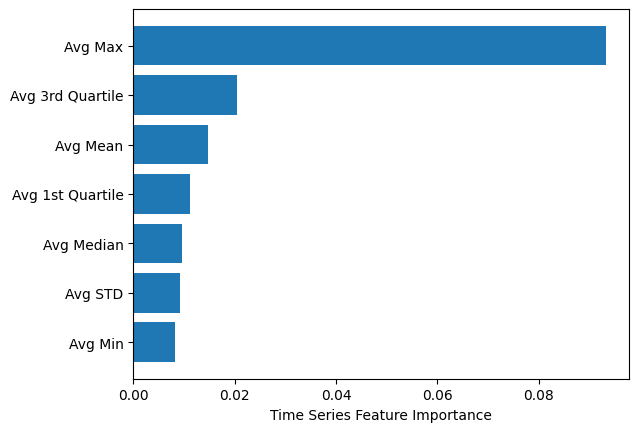

In [22]:
# Run feature selection algorithm from https://towardsdatascience.com/understanding-feature-importance-and-how-to-implement-it-in-python-ff0287b20285

X = stats_table.iloc[:,:42]
y = stats_table.iloc[:,-1]

# perform feature selection and pick all the features
rf = RandomForestRegressor(n_estimators=300, random_state=3)
rf.fit(X, y)

features = np.array_split(rf.feature_importances_, 6)
avg_importance = np.mean(features, axis=0)
sort = np.argsort(avg_importance)
fig, ax = plt.subplots()
ax.barh(np.array(['Avg Min', 'Avg Max', 'Avg Mean', 'Avg Median', 'Avg STD', 'Avg 1st Quartile', 'Avg 3rd Quartile'])[sort], avg_importance[sort])
ax.set_xlabel("Time Series Feature Importance")

Based on the results of the feature selection model above I believe the three most important features would be Mean, 3rd Quartile and Max. (https://towardsdatascience.com/understanding-feature-importance-and-how-to-implement-it-in-python-ff0287b20285).

## 2. ISLR 3.7.4

### (a) Linear Train

If the true relationship between X and Y is linear with Y = Beta0 + Beta1 * X then we can expect the RSS for the linear regression to be higher than the cubic regression. This is mainly because the cubic regression would have non-linear values that would allow it to overfit the training data and present a lower error.

### (b) Linear Test

For the aforementioned problem, the test RSS for the Linear Regression model would be lower than the cubic regression problem. This is because the overfit from the cubic regression model would lead to more error than the linear model  

### (c) Not Linear Train

If the relationship is non-linear then the cubic regression would have a lower RSS then the linear regression RSS. Since the cubic regression has more flexibility it would allow the cubic model to adjust more to the non-linear data.

### (d) Not Linear Testing

Since we do not know how linear the relationship is we cannot state whether the RSS would be lower for the cubic regression or the linear one. Additionally, due to the bias-variance tradeoff it is not possible to tell the amount of flexibility our model would require. Therefore, we can state that we don't have enough information to know which type of model will have a lower RSS.

## 3. ISLR 3.7.3 - Extra Practice 

## 3. ISLR 3.7.5 - Extra Practice 

# References

For Feature Selection: https://towardsdatascience.com/understanding-feature-importance-and-how-to-implement-it-in-python-ff0287b20285

Time Series Research: https://stats.stackexchange.com/questions/50807/features-for-time-series-classification

Time Series Research: https://www.researchgate.net/figure/Time-domain-features_tbl1_279991612#:~:text=The%20time%2Ddomain%20features%20are,Kurtosis%20and%20Skewness.%20...